# Assignment 1
## Create a Fully Connected Minimal Neural Network for MNIST Dataset

### Install necessary libraries
#### If the libraries are not installed, please uncomment the code cell below and run

In [65]:
# ! pip install numpy 

In [1]:
import sklearn
sklearn.__version__

'0.23.2'

### Import the necessary libraries

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Fetch the MNIST dataset

In [3]:
# WONT WORK WITH OLDER VERSIONS OF SCIKIT-LEARN
#from sklearn.datasets import fetch_mldata
#mnist = fetch_mldata('MNIST original')

In [4]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

### Normalization of data

In [5]:
type(X)

numpy.ndarray

In [6]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
len(X)

In [ ]:
X.info()

In [ ]:
X = X / 255
np.set_printoptions(threshold=np.inf)
X

### Preparing the dataset

In [11]:
digits = 10
examples = y.shape[0]

# y=y.to_numpy()

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [12]:
Y_new.shape

(10, 70000)

In [13]:
X.shape

(70000, 784)

In [16]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
shuffle_index = np.random.permutation(m)
# X_train = X_train.to_numpy()
X_train = X_train[:,shuffle_index]
Y_train = Y_train[:,shuffle_index]

In [17]:
type(shuffle_index)

numpy.ndarray

In [18]:
np.where(shuffle_index == 60000)

(array([], dtype=int64),)

In [19]:
Y_train.shape

(10, 60000)

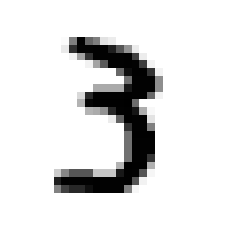

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
i = 3
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

### Loss function

In [21]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

### Sigmoif Func

In [22]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

### Train the model

In [101]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1
W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  7.904118123922766
Epoch 100 cost:  0.7315699805382442
Epoch 200 cost:  0.5568564635371003
Epoch 300 cost:  0.4815205145610626
Epoch 400 cost:  0.4358006825260376
Epoch 500 cost:  0.40378325977829704
Epoch 600 cost:  0.379539974267985
Epoch 700 cost:  0.36021898546818054
Epoch 800 cost:  0.34426240885989
Epoch 900 cost:  0.3307289823895736
Epoch 1000 cost:  0.31900272849685746
Epoch 1100 cost:  0.30866264416526207
Epoch 1200 cost:  0.29941305119710854
Epoch 1300 cost:  0.29104177937007597
Epoch 1400 cost:  0.2833930738575464
Epoch 1500 cost:  0.27634930947063346
Epoch 1600 cost:  0.2698196611624892
Epoch 1700 cost:  0.26373316575549643
Epoch 1800 cost:  0.25803395974505045
Epoch 1900 cost:  0.25267750734637484
Final cost: 0.24767634115627413


### Predictions

In [111]:
Y_test.shape

(10, 10000)

In [123]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)
print(confusion_matrix(predictions, labels))

ValueError: Shape of passed values is (10000, 1), indices imply (10, 10000)

In [120]:
print(classification_report(predictions, labels))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multilabel-indicator targets

## 92% Accuracy